In [23]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv(r'C:/Users/Shivam/Desktop/ml_prg/dataset/BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
def preprocessing(data):
    train = data.drop('class',axis=1)
    target = data[['class']]
    target = target.apply(LabelEncoder().fit_transform)
    train = train.apply(LabelEncoder().fit_transform)
    return train,target

In [29]:
class allSubset:
    def __init__(self,train,target,k):
        features = train.columns.tolist()
        self.sub_features = sample(features,k)
        self.xtrain, self.xtest, self.ytrain, self.ytest = train_test_split(train[self.sub_features],
                                                                            target,test_size=0.3,random_state=0)
        
    def model(self):
        feature_wise_acc = defaultdict(list)
        feature_wise_rmse = defaultdict(list)
        feature_record = defaultdict(list)
        for i in range(1,len(self.sub_features)+1):
            sf = list(combinations(self.sub_features,i))
            feature_record[i].append(sf)
            for j in range(len(sf)):
                logistic = LogisticRegression()
                xtrain = self.xtrain[list(sf[j])]
                ytrain = self.ytrain
                logistic.fit(xtrain,ytrain)
                predict = logistic.predict(xtrain)
                feature_wise_rmse[i].append(sqrt(mean_squared_error(predict,ytrain)))
                feature_wise_acc[i].append(logistic.score(xtrain,ytrain))
        return feature_record,feature_wise_acc,feature_wise_rmse,xtrain.columns
    
    def train_accuracy_graph(self,sub_features,feature_wise_acc):
        max_acc = [max(feature_wise_acc[j]) for j in range(1,len(sub_features)+1)]    
        plt.figure(figsize=(9,5))
        for i in range(1,len(sub_features)+1):
            plt.scatter([i]*len(feature_wise_acc[i]),feature_wise_acc[i],s=50)
        plt.plot(range(1,len(sub_features)+1),max_acc,c='black',linestyle='--')

        plt.xlabel("Feature Count",fontsize=15,labelpad=15)
        plt.ylabel("Train Accuracy",fontsize=15,labelpad=15)
        plt.title("All Subset graph",fontsize=15,pad=15)
        plt.xticks(size=13)
        plt.yticks(size=13)
        plt.show()
        
    def train_error_graph(self,sub_features,feature_wise_rmse):
        min_error = [min(feature_wise_rmse[j]) for j in range(1,len(sub_features)+1)]    
        plt.figure(figsize=(9,5))
        for i in range(1,len(sub_features)+1):
            plt.scatter([i]*len(feature_wise_rmse[i]),feature_wise_rmse[i],s=50)
        plt.plot(range(1,len(sub_features)+1),min_error,c='black',linestyle='--')

        plt.xlabel("Feature Count",fontsize=15,labelpad=15)
        plt.ylabel("Train Error",fontsize=15,labelpad=15)
        plt.title("All Subset graph",fontsize=15,pad=15)
        plt.xticks(size=13)
        plt.yticks(size=13)
        plt.show()

In [30]:
train,target = preprocessing(data)

In [31]:
k = 4  ## number of features to take into account from dataset, here we have assigned as 4 i.e all the features we need to check
asub = allSubset(train,target,k)

In [32]:
feature_record,feature_wise_acc,feature_wise_rmse,sub_features = asub.model()

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

In [33]:
print("Number of features : ",feature_wise_acc.keys())
print("List of features : ",sub_features.values)

Number of features :  dict_keys([1, 2, 3, 4])
List of features :  ['entropy' 'curtosis' 'skewness' 'variance']


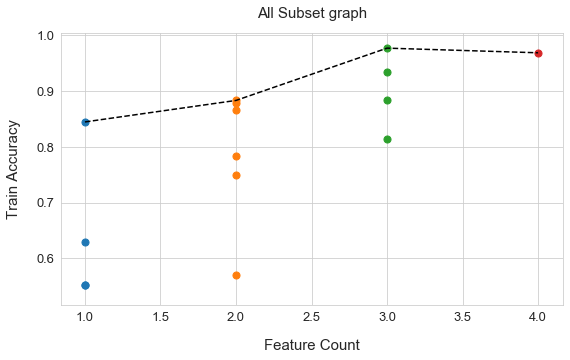

In [34]:
asub.train_accuracy_graph(sub_features,feature_wise_acc)

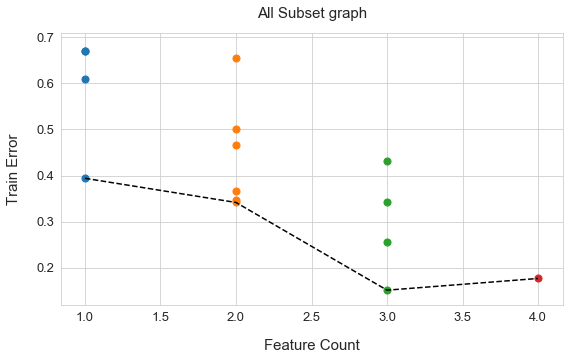

In [35]:
asub.train_error_graph(sub_features,feature_wise_rmse)

#### Validation :  Observing these graph we could say that as we increase the number of features as input for our model, training error reduces, which itself validates the concept that more and more features does make our model more flexible i.e. it is able to explain the data very well.

### Finding the optimal number of features

In [12]:
print('Feature Count and their accuracies : ')
feature_wise_acc

Feature Count and their accuracies : 


defaultdict(list,
            {1: [0.8447916666666667,
              0.6291666666666667,
              0.5520833333333334,
              0.5520833333333334],
             2: [0.8833333333333333,
              0.865625,
              0.8791666666666667,
              0.75,
              0.7833333333333333,
              0.5697916666666667],
             3: [0.8833333333333333,
              0.9770833333333333,
              0.934375,
              0.8145833333333333],
             4: [0.96875]})

In [13]:
print("Accuracies of all possible combination of that feature count that has lowest accuracy : \n",format(feature_wise_rmse[3]))
print("List of all those features : \n",*feature_record[3][0])

Accuracies of all possible combination of that feature count that has lowest accuracy : 
 [0.3415650255319866, 0.15138251770487457, 0.25617376914899, 0.4306003560921271]
List of all those features : 
 ('variance', 'skewness', 'entropy') ('variance', 'skewness', 'curtosis') ('variance', 'entropy', 'curtosis') ('skewness', 'entropy', 'curtosis')


In [14]:
index_min_feature_error = np.argmin(feature_wise_rmse[3])
sub_features = feature_record[3][0][index_min_feature_error]
print('Features with lowest error : ',sub_features)

Features with lowest error :  ('variance', 'skewness', 'curtosis')


### Model building with optimal features

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(train,target,test_size=0.3,random_state=0)
xtrain = xtrain[list(sub_features)]
xtest = xtest[list(sub_features)]

In [26]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print("Training Accuracy : ",lr.score(xtrain,ytrain))

Training Accuracy :  0.9770833333333333


In [28]:
pred = lr.predict(xtest)
print("Test Accuracy : ",accuracy_score(pred,ytest))

Test Accuracy :  0.9805825242718447
